# Newton's Method

### Charlie Bailey (peba2926)

## Hand graphing Newton's Method

### 1)

![Image of written work](./assets/IMG_0576.jpeg)

Method:
1. draw tangent line of $f(x)$ at $x = a_0$
2. Mark the point where this line crosses the $x$ axis
3. Find the point $(a_1, f(a_1))$
4. Repeat until convergence

**What values are the a's approaching?**

As we can see in the graph above, as we iteratively repeat this method, the $a$'s are converging on the root point $r$.

### 2)

![Image of written work](./assets/IMG_0577.jpeg)

**Same result with starting point between 0 and r?**

Picking a point between $0$ and $r$ does not give the same results as when we started at $a_0$ above. When following this same procedure, the tangent lines diverge—moving away from the $r$ point.

### 3)

![Image of written work](./assets/IMG_0578.jpeg)

**Try this method at a starting point where the derivative of f(x) appears to be 0:**

**What happens?**

As we can see in the graph above, after step one in the procedure, we need to exit since we cannot proceed to step two since the tangent line does not cross the x-axis.

**What error message should be returned?**

We could return a message that states what happened: "Error: the starting point entered has a derivative of zero. Please try again with another starting point."

**What is a simple next step if the users gets this message?**

If the user gets this message, they could iteratively try adding or subtracting a small value from their original starting point and attempt to run the program again. Alternatively, we could also do this programmatically so the users doesn't even need to worry about it.

### 4)

![Image of written work](./assets/IMG_0579.jpeg)

![Image of written work](./assets/IMG_0580.jpeg)

![Image of written work](./assets/IMG_0581.jpeg)

As we can see in the first two examples above, using this method quickly converges to a root with the first two example points chosen—very similar to the results we got in the first activity. Interestingly, though, in the third example, we do get to a root (or as close a we can at the current level of zoom); however, this root is not the root I would have expected based on the location of the example point chosen. The tangent line "jumps over" the root at ~2.25 and instead converges on the root at ~3. It's interesting to think about how even very slight changes in this $a_0$ point can lead to very different root convergence.

## Coding Newton's Method

### 5)

In [1]:
# from the week 4 activities
def numerical_point_derivative(f, a, h=0.0001):
    return (f(a + h) - f(a - h)) / (2*h)

def newton(f, num_steps=12):
    start = float(input("Please enter a start value: "))
    print('Start: ', start)
    # check if derivative at start point is 0
    if numerical_point_derivative(f, start) == 0:
        print(f'Error: the starting point {start} has a derivative of zero. Please try another start value.')
        return
    x = start
    for i in range(0,num_steps):
        print(i, ' ', x)
        # evaluate the derivative of f 
        fprime = numerical_point_derivative(f, x)
        # evaluate f at x, divide by the derivative at x, subtract from x
        x = x - f(x)/fprime

# invoke the newton method program
f = lambda x: (x**2)/4 + (x/4)-5
newton(f)

Start:  3.0
0   3.0
1   4.142857142855457
2   4.00219780219709
3   4.000000536441826
4   4.000000000000032
5   4.0
6   4.0
7   4.0
8   4.0
9   4.0
10   4.0
11   4.0


### 6)

I started by test the code above with some simple values. For this implementation, I decided to test out the user input functionality, so I can't specifically demonstrate each input; however I started completely blind with some simple values like -1, 0, 1 and by luck I quickly found both roots.

After using this guess and check method, I went over to Desmos to actually graph the function $\frac{x^2}{4} + \frac{x}{4} - 5$ and saw why it made sense the these three initial guesses found the roots so quickly.

From here, I wanted to see what happened as I entered values closer and closer to the saddle point of the parabola. Initially, when I tried -0.49 I didn't get convergence in the default 8 steps suggested by the textbook. However, as we see above, after I increased this number to 12, I was able to get convergence to two decimal places by the twelfth iteration.

### 7)

Since the saddle point for the function $\frac{x^2}{4} + \frac{x}{4} - 5$ is -0.5, using this point will trigger the error check in the `newton` code above since the derivative at this point is 0. We can see this demonstrated below:

In [2]:
# call newton func and manually enter -0.5
newton(f)

Start:  -0.5
Error: the starting point -0.5 has a derivative of zero. Please try another start value.


### 8)

In [3]:
# plotting tangent lines

def newton_plot(start, f, axes, xlim, ylim, ticks):
    # check if derivative at start point is 0
    if numerical_point_derivative(f, start) == 0:
        print(f'Error: the starting point {start} has a derivative of zero. Please try another start value.')
        return
    x = start
    for i, ax in enumerate(axes):
        # set the title to the x point
        ax.set_title(f'iteration: {i+1}   x = {round(x,4)}')
        # set the x and y lims based on function being graphed
        ax.set(xlim=xlim, ylim=ylim)
        # plot the original function
        ax.plot(ticks, f(ticks))
        # horizontal line at y=0
        ax.axhline(y=0, color='red')
        # evaluate the derivative of f 
        fprime = numerical_point_derivative(f, x)
        # create the tangent function
        tangent = lambda a: fprime * (a - x) + f(x)
        # plot the tangent line
        ax.plot(ticks, tangent(ticks))
        # plot the current x point
        ax.plot(x, f(x), marker='o', markersize=3, color='green')
        ax.grid(True)
        # evaluate f at x, divide by the derivative at x, subtract from x
        x = x - f(x)/fprime

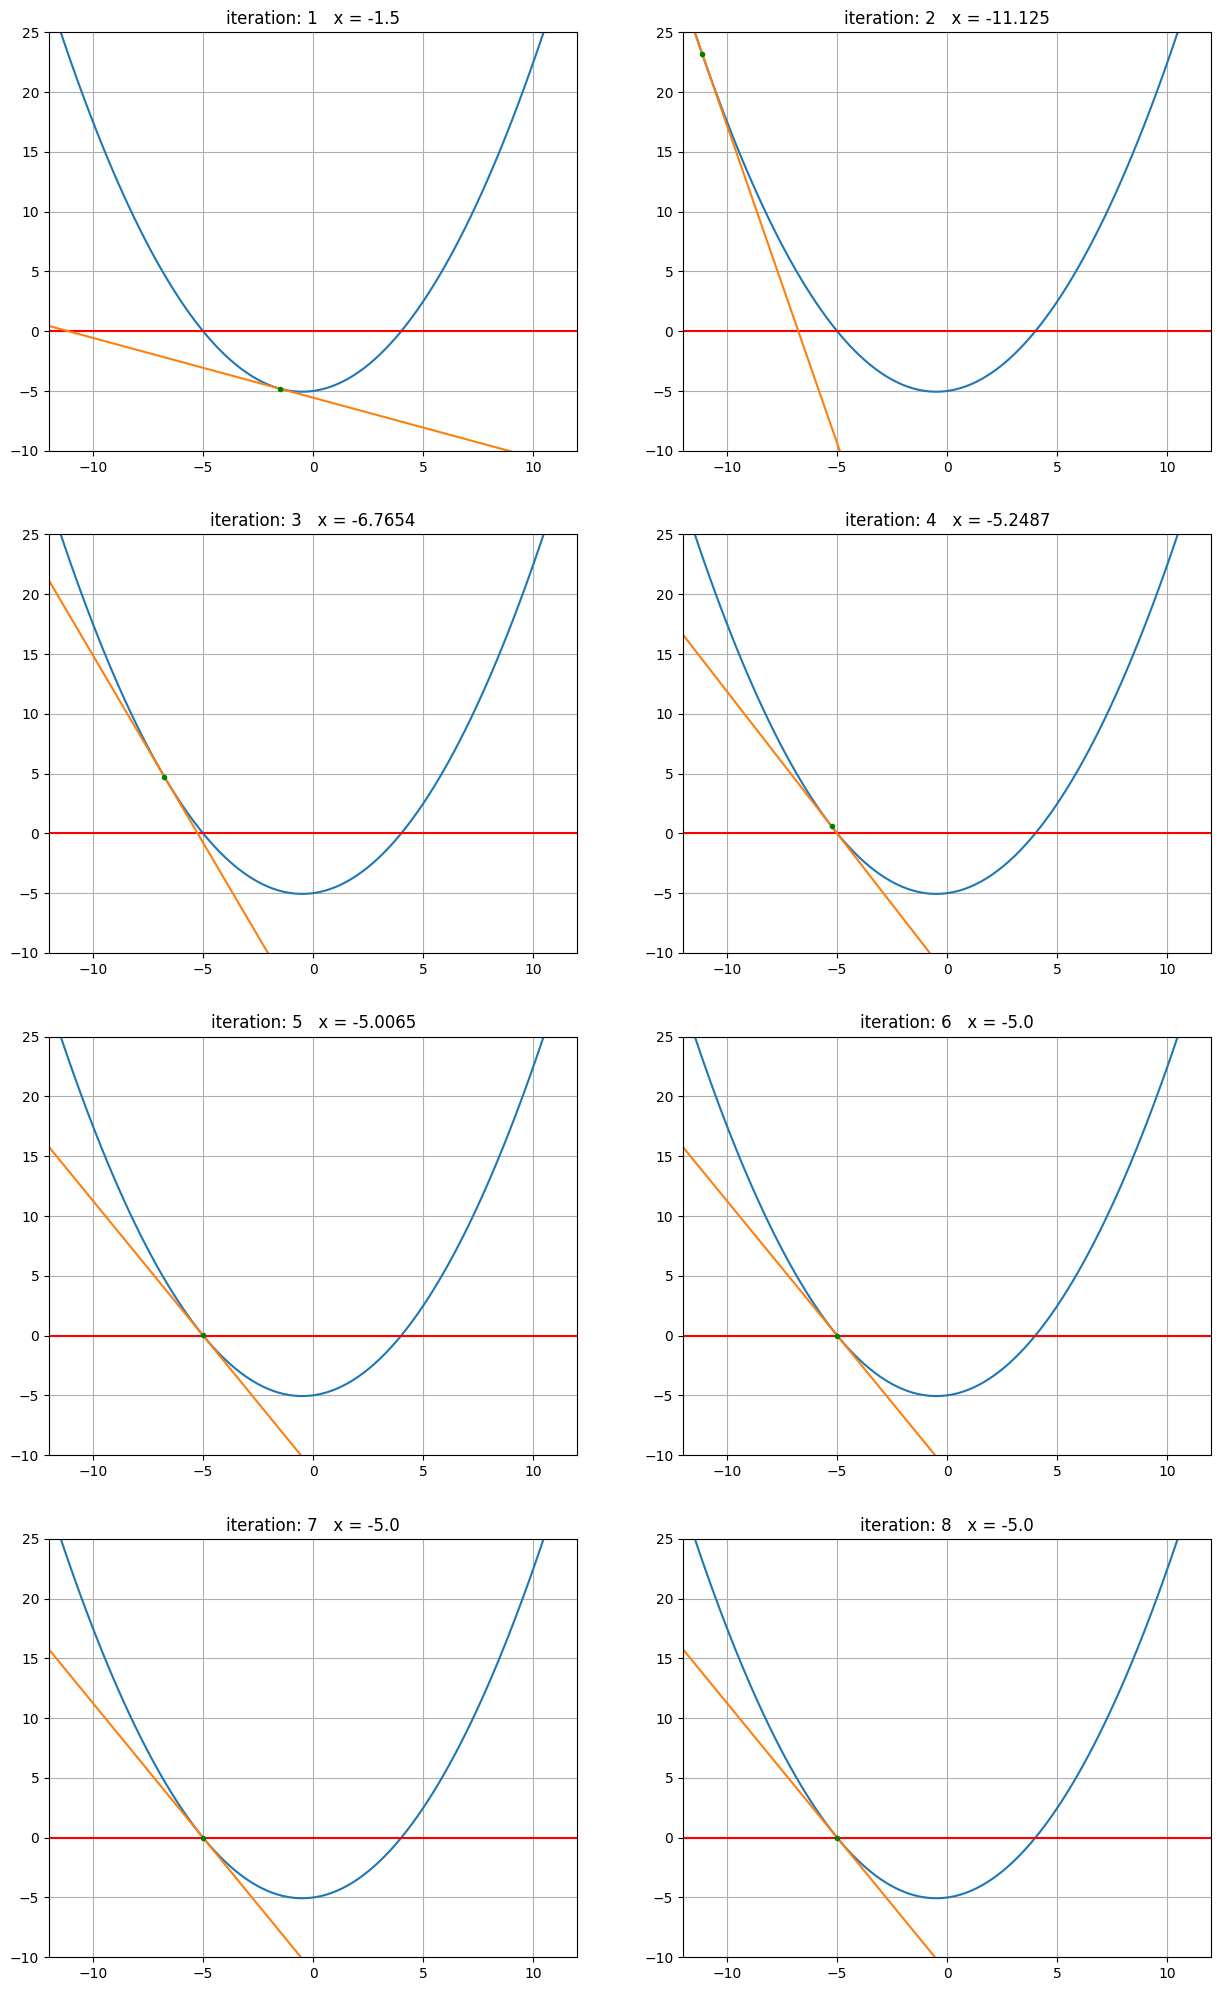

In [4]:
# create an animation of newton's method converging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# set axes for plotting
# the axes will be the number of steps that we will iterate for
ROWS = 4
COLS = 2
# set the start value manually rather than prompting user
START = -1.5
X_START = -12
X_END = 12

# determine the function to plot
f = lambda x: (x**2)/4 + (x/4)-5
# set the plotting points for the valid x range of this function
ticks = np.linspace(X_START, X_END, 100)
# set the x and y lim based on function being graphed
xlim = [X_START, X_END]
ylim = [-10,25]

# create the canvas
fig, axes = plt.subplots(ROWS, COLS, figsize=(15,25))
axes = axes.flatten()

# call the newton plotting function passing in axes to plot on
newton_plot(START, f, axes, xlim, ylim, ticks)

Looking at these series of plots from top left to bottom right, we can see how newton's method converges on the root of the function when we start with a value of -1.5.